In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import json


# Gathering Data
 

In [14]:
df_1=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
import requests

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open("image_predictions.tsv", "wb") as file:
    file.write(response.content)


In [4]:
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [5]:
tweets = []
with open('tweet_json.txt', 'r') as file:
  for line in file:
    data = json.loads(line)
    tweets.append(data)
df_3 = pd.DataFrame(tweets, columns=['id', 'retweet_count', 'favorite_count'])


# Assessing Data
 

In [6]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [45]:
df_1.shape

(2356, 17)

In [46]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [47]:
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [48]:
df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [74]:
df_1.duplicated().sum()

0

In [50]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [66]:
df_1.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [67]:
df_1.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [65]:
df_1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [69]:
df_1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [53]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [54]:
df_2.shape

(2075, 12)

In [55]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [56]:
df_2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [57]:
df_2.duplicated().sum()

0

In [58]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [59]:
df_3.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [60]:
df_3.shape

(2354, 3)

In [61]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [62]:
df_3.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [63]:
df_3.duplicated().sum()

0

In [64]:
df_3.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000



## Quality issues

### Twitter archive dataframe

1/ tweet_id should be string not int

2/ The time stamp should be date time not object

3/ We should delete unecessary columns in the dataset

4/ drop rating denominator that's different than 10

5/ delete data after 1st of  Aug 1st, 2017


### Image predictions dataframe

1/ tweet_id should be string not int

### Tweet data dataframe

1/ id should be string not int

2/id should be named tweet_id 

## tidiness issues

1/ Columns doggo,floofer, pupper and puppo should be combined in one column

2/ combine all dataframes into one dataframe


# Cleaning Data
 

In [7]:
#make copy
df_11 = df_1.copy()
df_22 = df_2.copy()
df_33 = df_3.copy()


#### define 1 : 
* change id name to tweet_id 
 


#### code

In [8]:
df_33.rename(columns = {'id' : "tweet_id"}, inplace= True)


#### test

In [79]:
df_33.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048



#### define 2 : 
* change data type for tweet_id from int to string in df_11
 


#### code

In [9]:
df_11['tweet_id'] = df_11['tweet_id'].astype(str)


#### test

In [100]:
print(df_11['tweet_id'].dtypes)

object



#### define 3 : 
* change data type for tweet_id from int to string in df_22
 


#### code

In [10]:
df_22['tweet_id'] = df_22['tweet_id'].astype(str)


#### test

In [103]:
print(df_22['tweet_id'].dtypes)

object



#### define 4 : 
* change data type for tweet_id from int to string in df_33
 


#### code

In [11]:
df_33['tweet_id'] = df_33['tweet_id'].astype(str)


#### test

In [105]:
print(df_33['tweet_id'].dtypes)

object



#### define 5 : 
* tidy: merge 3 data frames
 


#### code

In [21]:
df = pd.merge(pd.merge(df_11, df_22, on='tweet_id'), df_33, on='tweet_id')


#### test

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 


#### define 6 : 
* change data type for timestamp from string to datetime

 


#### code

In [22]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


#### test

In [89]:
print(df['timestamp'].dtypes)

datetime64[ns, UTC]


In [90]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048



#### define 7: 
* remove rows contain retweets 


#### code

In [24]:
df = df[df.retweeted_status_id.isnull()]
df = df[df.retweeted_status_user_id.isnull()]
df = df[df.retweeted_status_timestamp.isnull()]


#### test

In [25]:
print(df['retweeted_status_id'].isnull().all())
print(df['retweeted_status_user_id'].isnull().all())
print(df['retweeted_status_timestamp'].isnull().all())

True
True
True



#### define 8 : 
* drop unecessary columns
 


#### code

In [26]:
df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)


#### test

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   object             
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   object             
 3   text                2073 non-null   object             
 4   expanded_urls       2073 non-null   object             
 5   rating_numerator    2073 non-null   int64              
 6   rating_denominator  2073 non-null   int64              
 7   name                2073 non-null   object             
 8   doggo               2073 non-null   object             
 9   floofer             2073 non-null   object             
 10  pupper              2073 non-null   object             
 11  puppo               2073 non-null   object             
 12  jpg_url             2073 non-null 


#### define 9 : 
* delete data after 1st of  Aug 1st, 2017 
 


#### code

In [27]:
df = df[df.timestamp < '2017-08-02 00:00:00']


#### test

In [111]:
df.timestamp.max()

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')


#### define 10 : 
* drop rating denominator that's different than 10
 


#### code

In [28]:
ind = df[df['rating_denominator'] != 10].index

df.drop(index=ind, axis=0, inplace=True)


#### test

In [114]:
df.rating_denominator.unique()

array([10], dtype=int64)


#### define 11 : 
* tidy : Columns doggo,floofer, pupper and puppo should be combined in one column


#### code

In [29]:
df['dog_stage'] = df.apply(lambda row: 
                             ', '.join([x for x in ['doggo', 'floofer', 'pupper', 'puppo'] if row[x] != 'None']), axis=1)

df['dog_stage'].replace({'': 'None', 'doggo, pupper': 'doggo_pupper', 'doggo, puppo': 'doggo_puppo', 
                           'doggo, floofer': 'doggo_floofer'}, inplace=True)


In [30]:
df.drop(['doggo','floofer','pupper','puppo'],axis = 1,inplace = True)


#### test

In [126]:
df.dog_stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo_puppo',
       'doggo_floofer', 'doggo_pupper'], dtype=object)

In [127]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,None



# Storing Data
 

In [31]:
df.to_csv("twitter_archive_master.csv", index= False)


# Analyzing and Visualizing Data
 

In [32]:
# Select tweets that have a name and count the occurrences of each name
dog_names = df.loc[df['name'].notnull()].groupby('name')['tweet_id'].count()

In [33]:
# Sort names by popularity
popular_dog_names = dog_names.sort_values(ascending=False)

In [34]:
# Select the top 10 most popular dog names
popular_dog_names.head(10)

name
None       534
a           54
Charlie     11
Cooper      10
Lucy        10
Oliver      10
Tucker       9
Penny        9
Winston      8
Sadie        8
Name: tweet_id, dtype: int64

In [35]:
# plot the top 10 dog names excluding the value None and a 
top_10_popular_dog_names = popular_dog_names.iloc[2:12]

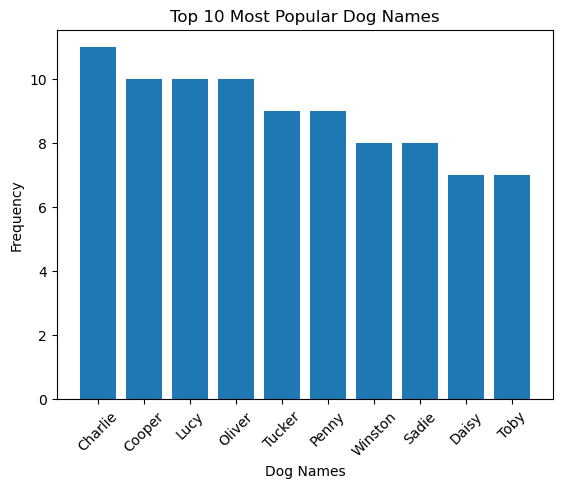

In [36]:
plt.bar(top_10_popular_dog_names.index, top_10_popular_dog_names)
plt.title('Top 10 Most Popular Dog Names')
plt.xlabel('Dog Names')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### Insight 
* Charlie is the most dog name

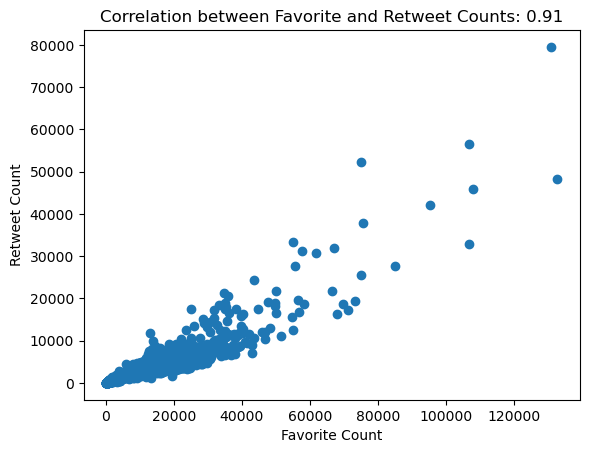

In [37]:
# Select the columns of interest
cols_of_interest = ['favorite_count', 'retweet_count']
df_subset = df[cols_of_interest]

# Compute the correlation between the two columns
corr = df_subset.corr().iloc[0,1]

# Create a scatter plot
plt.scatter(df['favorite_count'], df['retweet_count'])
plt.title(f'Correlation between Favorite and Retweet Counts: {corr:.2f}')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.show()


### Insight 
* there is strong positive correlation between 'favorite_count'and 'retweet_count'

C:\Users\Boukaka-PC\AppData\Local\Temp\ipykernel_4716\3713527136.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(data=cleaned_archived_dog_stages, x='dog_stage', y='favorite_count', ci=None)


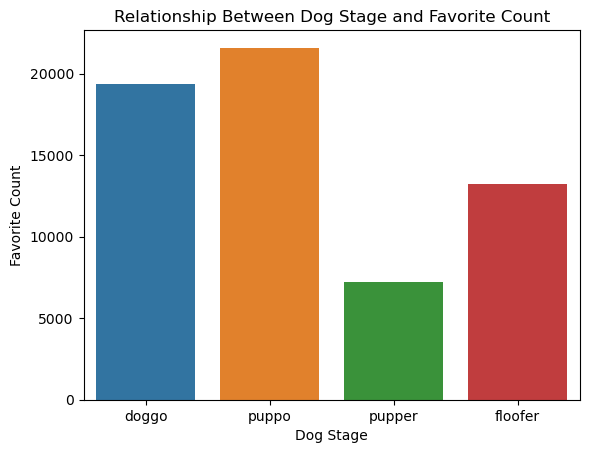

In [38]:
# Select the rows with dog stages in the dogtionary
dog_stages = ['doggo', 'puppo', 'floofer', 'pupper']
cleaned_archived_dog_stages = df[df['dog_stage'].isin(dog_stages)]

# Plot the relationship between dog stage and favorite count

sb.barplot(data=cleaned_archived_dog_stages, x='dog_stage', y='favorite_count', ci=None)
plt.title("Relationship Between Dog Stage and Favorite Count")
plt.xlabel("Dog Stage")
plt.ylabel("Favorite Count")
plt.show()



### Insight 
* puppo had the most favorite count